# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [80]:
# the 3 observations from the analyzed data are:
# 1) the distribution of male/female mice is fairly and evenly distributed, with just 2% more males than females
# 2) the tumor volume distribution group by treatment regimen chart indicates ramicane performing slightly better than capomulin
# 3) the correlation coefficient of .84 indicates a strong relationship between mouse weight and tumor volume where heavier mice have larger tumors


In [7]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
# Merge the two data frames on "Mouse ID"
merge_study_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the merged data table for preview
merge_study_df



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [8]:
# Count the number of unique mice
study_grouped = pd.DataFrame(merge_study_df.groupby("Mouse ID"))
num_mice = len(study_grouped)
print(f"Number of mice: {num_mice}")

Number of mice: 249


In [20]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# Identify duplicate rows based on "Mouse ID" and "Timepoint"
duplicate_rows = merge_study_df.duplicated(subset=["Mouse ID", "Timepoint"], keep=False)

# Filter the DataFrame to show only the duplicate rows
duplicate_mice = merge_study_df[duplicate_rows]
duplicate_mice_df = pd.DataFrame(duplicate_mice)


# Assuming duplicated_mice is a DataFrame or a subset of your original DataFrame
duplicated_mice = merge_study_df.groupby(["Mouse ID", "Timepoint"]).size()
duplicate_mice_df = pd.DataFrame(duplicated_mice, columns=["Count"])

# Filter the DataFrame to include only rows where count is greater than 1
filtered_duplicate_mice_df = duplicate_mice_df[duplicate_mice_df["Count"] > 1]

# Display the DataFrame
print("Filtered Duplicate Mice DataFrame:")
print(filtered_duplicate_mice_df)

Filtered Duplicate Mice DataFrame:
                    Count
Mouse ID Timepoint       
g989     0              2
         5              2
         10             2
         15             2
         20             2


In [21]:
# Optional: Get all the data for the duplicate mouse ID. 
all_data_duplicate_mice = merge_study_df[duplicate_rows]
all_data_duplicate_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [25]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
#cleaned_df = merged_df.drop_duplicates(subset=["Mouse ID"]) 
# Checking the number of mice in the clean DataFrame.
mouse_id_to_drop = "g989"

# Drop duplicates based on "Mouse ID" and "Timepoint"
cleaned_df = merge_study_df.drop_duplicates(subset=["Mouse ID", "Timepoint"])

# Drop rows with the specified "Mouse ID"
cleaned_df = cleaned_df[cleaned_df["Mouse ID"] != mouse_id_to_drop]

# Display the clean DataFrame
print("Cleaned DataFrame:")
print(cleaned_df)

Cleaned DataFrame:
     Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0        k403     Ramicane  Male          21          16          0   
1        k403     Ramicane  Male          21          16          5   
2        k403     Ramicane  Male          21          16         10   
3        k403     Ramicane  Male          21          16         15   
4        k403     Ramicane  Male          21          16         20   
...       ...          ...   ...         ...         ...        ...   
1888     z969     Naftisol  Male           9          30         25   
1889     z969     Naftisol  Male           9          30         30   
1890     z969     Naftisol  Male           9          30         35   
1891     z969     Naftisol  Male           9          30         40   
1892     z969     Naftisol  Male           9          30         45   

      Tumor Volume (mm3)  Metastatic Sites  
0              45.000000                 0  
1              38.825898              

In [26]:
# Checking the number of mice in the clean DataFrame.
num_unique_mice = cleaned_df["Mouse ID"].nunique()

print("Number of unique mice in the clean DataFrame:", num_unique_mice)

Number of unique mice in the clean DataFrame: 248


## Summary Statistics

In [27]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

grouped_drug_reg = cleaned_df.groupby("Drug Regimen")

# Calculate the required summary statistics for tumor volume
summary_stats = grouped_drug_reg['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])

# Rename the columns for clarity
summary_stats = summary_stats.rename(columns={
    'mean': 'Mean Tumor Volume',
    'median': 'Median Tumor Volume',
    'var': 'Tumor Volume Variance',
    'std': 'Tumor Volume Std. Dev.',
    'sem': 'Tumor Volume SEM'
})

# Display the summary statistics DataFrame
print("Summary Statistics for Tumor Volume by Drug Regimen:")
print(summary_stats)

Summary Statistics for Tumor Volume by Drug Regimen:
              Mean Tumor Volume  Median Tumor Volume  Tumor Volume Variance  \
Drug Regimen                                                                  
Capomulin             40.675741            41.557809              24.947764   
Ceftamin              52.591172            51.776157              39.290177   
Infubinol             52.884795            51.820584              43.128684   
Ketapril              55.235638            53.698743              68.553577   
Naftisol              54.331565            52.509285              66.173479   
Placebo               54.033581            52.288934              61.168083   
Propriva              52.320930            50.446266              43.852013   
Ramicane              40.216745            40.673236              23.486704   
Stelasyn              54.233149            52.431737              59.450562   
Zoniferol             53.236507            51.818479              48.533355   

In [28]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line



# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
mean = round(cleaned_df["Tumor Volume (mm3)"].mean(), 2)
median = round(cleaned_df["Tumor Volume (mm3)"].median(), 2)
variance = round(cleaned_df["Tumor Volume (mm3)"].var(), 2)
standard_deviation = round(cleaned_df["Tumor Volume (mm3)"].std(), 2)
sem = round(cleaned_df["Tumor Volume (mm3)"].sem(), 2)

summary_stats_adv = pd.DataFrame({"Mean": [mean], "Median": [median], "Variance": [variance], "Standard Deviation": [standard_deviation], "SEM": [sem]})


summary_stats_adv

,Mean,Median,Variance,Standard Deviation,SEM
0,50.44,48.93,79.46,8.91,0.21


## Bar and Pie Charts

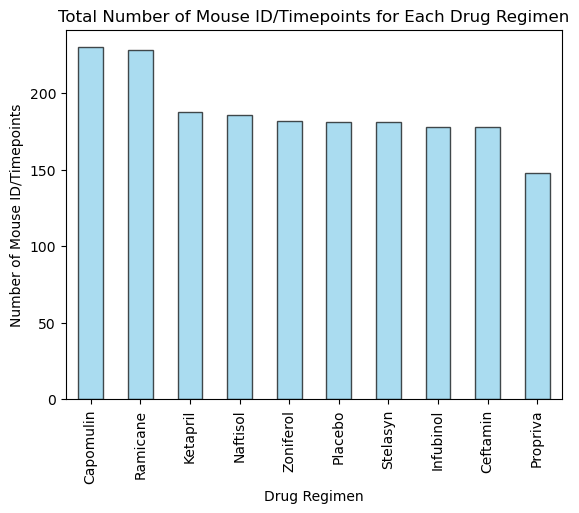

In [31]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

# Group the cleaned DataFrame by 'Drug Regimen' and count the number of rows for each regimen
#grouby drug regimen and count the number of Mouse ID's to get measurements taken by drug regimen

regimen_counts = cleaned_df["Drug Regimen"].value_counts()

# Plotting the bar chart using Pandas
regimen_counts.plot(kind='bar', color='skyblue', alpha=0.7, edgecolor='black')

# Adding labels and title
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Mouse ID/Timepoints')
plt.title('Total Number of Mouse ID/Timepoints for Each Drug Regimen')

# Display the plot
plt.show()

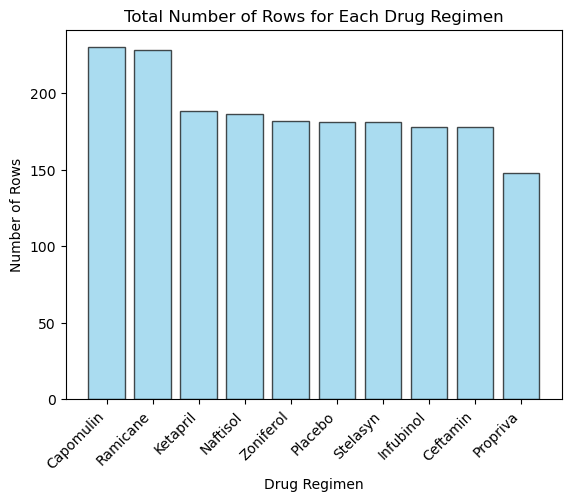

In [32]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

import matplotlib.pyplot as plt

# Group the cleaned DataFrame by 'Drug Regimen' and count the number of rows for each regimen
regimen_counts = cleaned_df['Drug Regimen'].value_counts()

# Create a bar plot using Pyplot
plt.bar(regimen_counts.index, regimen_counts, color='skyblue', alpha=0.7, edgecolor='black')

# Set the title and labels
plt.title('Total Number of Rows for Each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Rows')

# Rotate x-axis labels for better visibility (optional)
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.show()

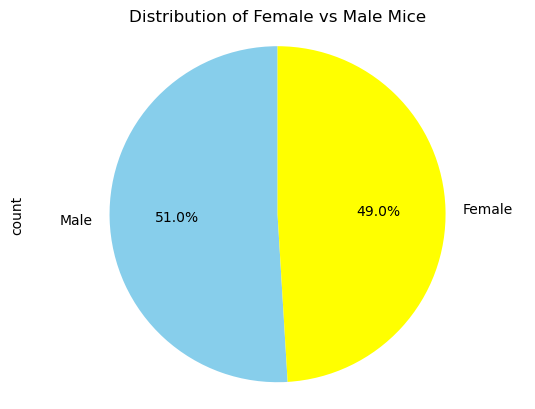

In [33]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_distribution = cleaned_df['Sex'].value_counts()

# Create a pie plot using Pandas
gender_distribution.plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'yellow'], startangle=90)

# Set the title
plt.title('Distribution of Female vs Male Mice')

# Display the plot
plt.axis('equal')  # Equal aspect ratio ensures that the pie is drawn as a circle.
plt.show()

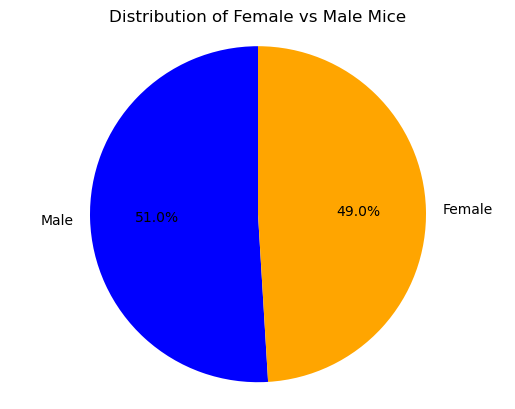

In [34]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

import matplotlib.pyplot as plt

# Use value_counts to count the number of male and female mice
gender_distribution = cleaned_df['Sex'].value_counts()

# Create a pie plot using pyplot
plt.pie(gender_distribution, labels=gender_distribution.index, autopct='%1.1f%%', colors=['blue', 'orange'], startangle=90)

# Set the title
plt.title('Distribution of Female vs Male Mice')

# Display the plot
plt.axis('equal')  # Equal aspect ratio ensures that the pie is drawn as a circle.
plt.show()

## Quartiles, Outliers and Boxplots

In [37]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint



# List of the four treatment regimens
selected_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Filter the cleaned DataFrame for the selected regimens
selected_regimens_df = cleaned_df[cleaned_df['Drug Regimen'].isin(selected_regimens)]

# Find the last (greatest) timepoint for each mouse
last_timepoints = selected_regimens_df.groupby('Mouse ID')['Timepoint'].max()

# Create a DataFrame with the last timepoints
last_timepoints_df = pd.DataFrame(last_timepoints)

# Merge this DataFrame with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_volume_df = pd.merge(last_timepoints_df, cleaned_df, on=['Mouse ID', 'Timepoint'], how='inner')

# Display the DataFrame with the final tumor volume
print("Final Tumor Volume for Each Mouse:")
print(final_tumor_volume_df)



Final Tumor Volume for Each Mouse:
   Mouse ID  Timepoint Drug Regimen     Sex  Age_months  Weight (g)  \
0      a203         45    Infubinol  Female          20          23   
1      a251         45    Infubinol  Female          21          25   
2      a275         45     Ceftamin  Female          20          28   
3      a411         45     Ramicane    Male           3          22   
4      a444         45     Ramicane  Female          10          25   
..      ...        ...          ...     ...         ...         ...   
95     y769         45     Ceftamin  Female           6          27   
96     y793         45    Capomulin    Male          17          17   
97     y865         45     Ceftamin    Male          23          26   
98     z578         45     Ramicane    Male          11          16   
99     z581         45    Infubinol  Female          24          25   

    Tumor Volume (mm3)  Metastatic Sites  
0            67.973419                 2  
1            65.525743    

In [65]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes

    
    # add subset 

    
    # Determine outliers using upper and lower bounds

# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Loop through each treatment
for treatment in treatments:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    treatment_data = final_tumor_volume_df[final_tumor_volume_df['Drug Regimen'] == treatment]['Tumor Volume (mm3)']
    
    # Add subset
    tumor_vol_data.append(treatment_data)
    
    # Calculate the IQR and quantitatively determine if there are any potential outliers
    quartiles = treatment_data.quantile([0.25, 0.5, 0.75])
    lower_quartile = quartiles[0.25]
    upper_quartile = quartiles[0.75]
    iqr = upper_quartile - lower_quartile

    lower_bound = lower_quartile - 1.5 * iqr
    upper_bound = upper_quartile + 1.5 * iqr

    # Determine outliers
    outliers = treatment_data[(treatment_data < lower_bound) | (treatment_data > upper_bound)]
    
    # Display results
    print(f"\nTreatment: {treatment}")
    print(f"IQR: {iqr}")
    print(f"Outliers: {outliers.tolist()}")

# Display tumor volume data for plotting
print("\nTumor Volume Data for Plotting:")
print(tumor_vol_data)





Treatment: Capomulin
IQR: 7.781863460000004
Outliers: []

Treatment: Ramicane
IQR: 9.098536719999998
Outliers: []

Treatment: Infubinol
IQR: 11.477135160000003
Outliers: [36.3213458]

Treatment: Ceftamin
IQR: 15.577752179999997
Outliers: []

Tumor Volume Data for Plotting:
[9     38.982878
12    38.939633
24    30.485985
25    37.074024
26    40.159220
32    47.685963
33    37.311846
34    38.125164
35    38.753265
45    41.483008
49    38.846876
51    28.430964
53    33.329098
64    46.539206
65    32.377357
68    41.581521
70    23.343598
72    40.728578
73    34.455298
78    31.023923
82    40.658124
83    39.952347
88    36.041047
90    28.484033
96    31.896238
Name: Tumor Volume (mm3), dtype: float64, 3     38.407618
4     43.047543
5     38.810366
7     32.978522
16    38.342008
17    33.397653
19    37.311236
21    40.659006
27    29.128472
29    33.562402
30    36.374510
37    31.560470
38    36.134852
40    22.050126
50    30.564625
54    31.095335
62    45.220869
63    36.5

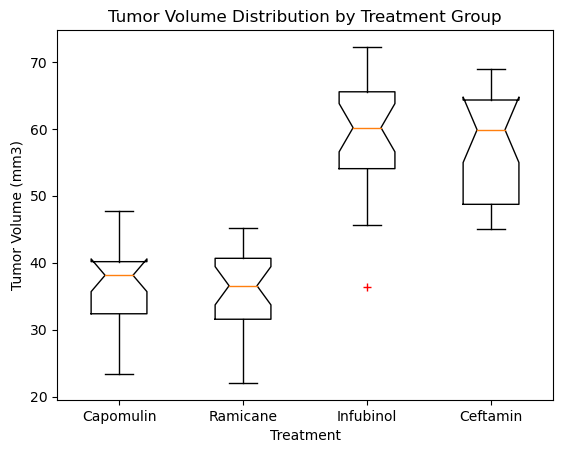

In [66]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
import matplotlib.pyplot as plt

# Create a box plot for the tumor volume distribution of each treatment group
plt.boxplot(tumor_vol_data, labels=treatments, notch=True, sym='r+')

# Set the title and labels
plt.title('Tumor Volume Distribution by Treatment Group')
plt.xlabel('Treatment')
plt.ylabel('Tumor Volume (mm3)')

# Display the plot
plt.show()

## Line and Scatter Plots

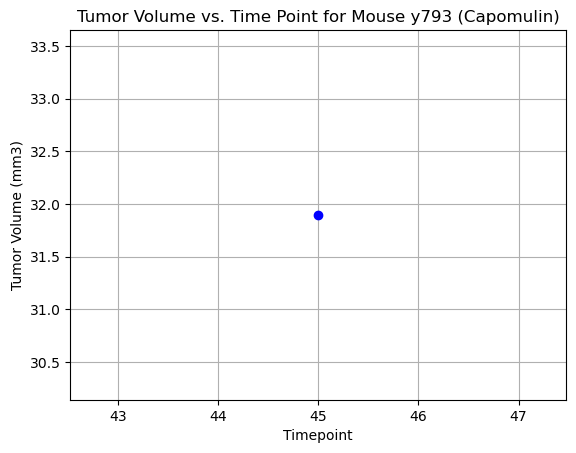

In [72]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


import matplotlib.pyplot as plt

# Choose a single mouse treated with Capomulin (replace 'example_mouse_id' with the actual mouse ID)
mouse_id = 'y793'

# Create a DataFrame for the Capomulin regimen
capomulin_df = final_tumor_volume_df[final_tumor_volume_df['Drug Regimen'] == 'Capomulin']

# Choose a single mouse from the Capomulin regimen
capomulin_single_mouse = capomulin_df[capomulin_df['Mouse ID'] == mouse_id]

# Check if the mouse_id exists in the Capomulin DataFrame
if not capomulin_single_mouse.empty:
    # Create a line plot for tumor volume vs. time point
    plt.plot(capomulin_single_mouse['Timepoint'], capomulin_single_mouse['Tumor Volume (mm3)'], marker='o', linestyle='-', color='blue')

    # Set the title and labels
    plt.title(f'Tumor Volume vs. Time Point for Mouse {mouse_id} (Capomulin)')
    plt.xlabel('Timepoint')
    plt.ylabel('Tumor Volume (mm3)')

    # Display the plot
    plt.grid(True)
    plt.show()
else:
    print(f"No data found for Mouse ID {mouse_id} in the Capomulin regimen.")

In [73]:
final_tumor_volume_df

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a275,45,Ceftamin,Female,20,28,62.999356,3
3,a411,45,Ramicane,Male,3,22,38.407618,1
4,a444,45,Ramicane,Female,10,25,43.047543,0
...,...,...,...,...,...,...,...,...
95,y769,45,Ceftamin,Female,6,27,68.594745,4
96,y793,45,Capomulin,Male,17,17,31.896238,2
97,y865,45,Ceftamin,Male,23,26,64.729837,3
98,z578,45,Ramicane,Male,11,16,30.638696,0


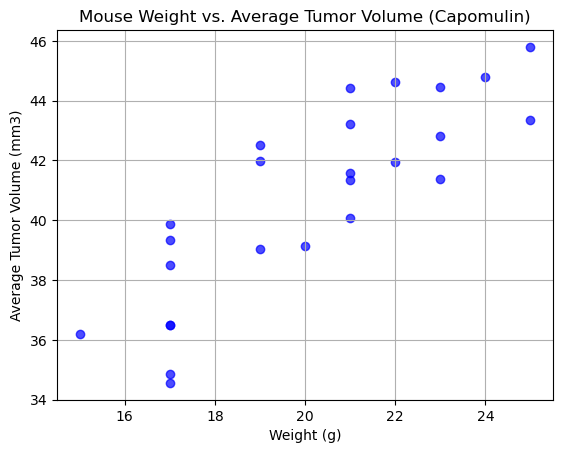

In [76]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

import matplotlib.pyplot as plt

# Filter the cleaned DataFrame for the Capomulin regimen
capomulin_data = cleaned_df[cleaned_df['Drug Regimen'] == 'Capomulin']

# Calculate the average observed tumor volume for each mouse
average_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

# Merge the average tumor volume data with the mouse weight data
merged_data = pd.merge(average_tumor_volume, capomulin_data[['Mouse ID', 'Weight (g)']].drop_duplicates(), on='Mouse ID', how='inner')

# Create a scatter plot of mouse weight vs. average observed tumor volume
theplot = plt.scatter(merged_data['Weight (g)'], merged_data['Tumor Volume (mm3)'], marker='o', color='blue', alpha=0.7)

# Set the title and labels
plt.title('Mouse Weight vs. Average Tumor Volume (Capomulin)')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

# Display the plot
plt.grid(True)
theplot

## Correlation and Regression

Correlation Coefficient: 0.841936342469472


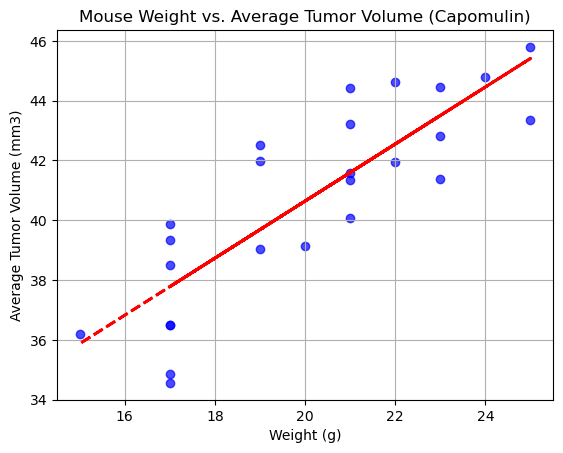

In [79]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

import matplotlib.pyplot as plt
from scipy.stats import pearsonr, linregress

# Filter the cleaned DataFrame for the Capomulin regimen
capomulin_data = cleaned_df[cleaned_df['Drug Regimen'] == 'Capomulin']

# Calculate the average observed tumor volume for each mouse
average_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

# Merge the average tumor volume data with the mouse weight data
merged_data = pd.merge(average_tumor_volume, capomulin_data[['Mouse ID', 'Weight (g)']].drop_duplicates(), on='Mouse ID', how='inner')

# Calculate the correlation coefficient
correlation_coefficient, _ = pearsonr(merged_data['Weight (g)'], merged_data['Tumor Volume (mm3)'])
print(f'Correlation Coefficient: {correlation_coefficient}')

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(merged_data['Weight (g)'], merged_data['Tumor Volume (mm3)'])

# Create a scatter plot of mouse weight vs. average observed tumor volume
theplot2 = plt.scatter(merged_data['Weight (g)'], merged_data['Tumor Volume (mm3)'], marker='o', color='blue', alpha=0.7)

# Plot the linear regression line
regression_line = slope * merged_data['Weight (g)'] + intercept
plt.plot(merged_data['Weight (g)'], regression_line, color='red', linestyle='--', linewidth=2)
# Set the title and labels
plt.title('Mouse Weight vs. Average Tumor Volume (Capomulin)')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

# Display the plot
plt.grid(True)
theplot2